In [1]:
import os
import sys
sys.path.append('..')
sys.path.append('../../')
from glob import glob

from config.config import cfg

In [2]:
import numpy as np
from plyfile import PlyData

## 3D Plot 用ライブラリをロード

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
base_dir = cfg.LINEMOD_DIR
object_name = 'ape'

## read_ply_model Test

In [5]:
def read_ply_model(model_path: str) -> np.array:
        """
         `.ply` 形式で保存された 3D モデルを numpy 配列として読み出す関数
        
        Arg:
            model_path(str): `.ply` 形式で保存された3Dモデルへのパス

        Return:
            (np.array): numpy配列に変換した 3D モデル 
        """
        ply = PlyData.read(model_path)
        data = ply.elements[0].data
        x = data['x']
        y = data['y']
        z = data['z']
        return np.stack([x, y, z], axis=-1)

In [6]:
filenames = glob(os.path.join(base_dir, object_name, 'mesh.ply'))
print(filenames)
filename = filenames[0]

ply_model = read_ply_model(filename)
print('ply_model = ')
print(ply_model)
print('shape =', ply_model.shape)

['/media/miki/DATA/My_programing/python/AI/Analysis/data/linemod/ape/mesh.ply']
ply_model = 
[[ 27.601    22.0686  -37.7873 ]
 [ 17.4218  -24.9059  -16.8277 ]
 [ 36.8221  -13.0557  -12.0928 ]
 ...
 [  4.05309  27.7681   -4.69088]
 [ 20.2621  -22.0967  -25.9147 ]
 [ 17.7486   13.0133  -84.2276 ]]
shape = (5841, 3)


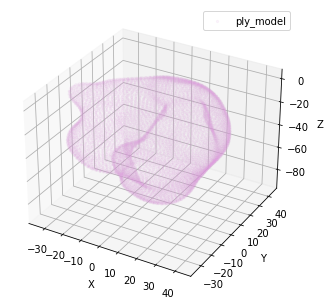

In [7]:
X_ply_model = []
Y_ply_model = []
Z_ply_model = []

for value in ply_model:
    X_ply_model.append(value[0])
    Y_ply_model.append(value[1])
    Z_ply_model.append(value[2])

# グラフの枠を作成
fig = plt.figure()
ax = Axes3D(fig)

# X,Y,Z軸にラベルを設定
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# .scatterで描画
ax.scatter(X_ply_model,
                      Y_ply_model,
                      Z_ply_model,
                      s=5,
                      c="plum",
                      marker="o",
                      alpha=0.1,
                      label="ply_model")

# 凡例を表示          
ax.legend()

# 最後に.show()を書いてグラフ表示
plt.show()